# 03 - Faces 🎭

Now we will play with images of faces.

We will use PCA in order to generate a basis of faces, on which all faces can be generated (hypothetically).

---

![](https://cdn.shopify.com/s/files/1/2113/8949/products/GOT123_14x11_MAIN_SITE.jpg?v=1541202119)

---

In [6]:
# Import the libraries
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

We will now load the dataset using `fetch_olivetti_faces` from scikit-learn datasets.

In [7]:
# Load the dataset in sklearn.datasets using fetch_olivetti_faces
faces = fetch_olivetti_faces().data

Let's explore quickly the data

In [8]:
faces.shape

(400, 4096)

In [9]:
faces.shape[1]**(1/2)

64.0

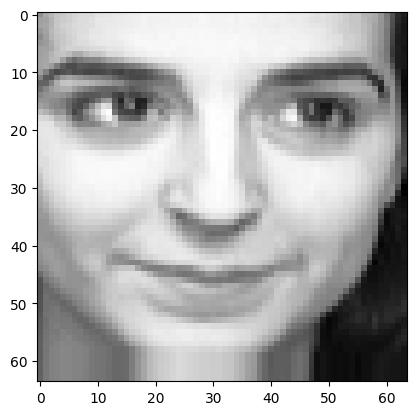

In [10]:
# TODO: display an image (you change display several images if you want!) using imshow and reshape
num_pic = random.randint(0, 400)

plt.figure()

plt.imshow(faces[num_pic].reshape(64,64), cmap='gray')

plt.show()

Let's compute the mean image of the dataset and display it.

In [11]:
# Compute the mean image and display it
faces_average = faces.mean(axis=0)

In [12]:
faces_average

array([0.40013435, 0.43423545, 0.4762809 , ..., 0.32141536, 0.3136469 ,
       0.31045464], dtype=float32)

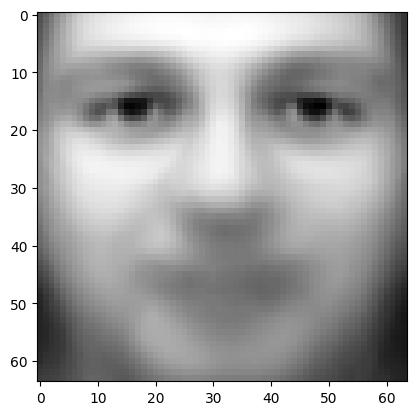

In [13]:
plt.figure()

plt.imshow(faces_average.reshape(64,64), cmap='gray')

plt.show()

Let's substract this mean from the original dataset, and call this dataset `centered_faces`.

In [14]:
# Substract the mean face from every face in the original data
centered_faces = faces - faces_average

Let's apply a PCA algorithm, keeping "only" 256 dimensions and compute the retained variance.

In [15]:
# Apply a PCA with 256 dimensions kept
pca = PCA(n_components=256)
pca.fit(centered_faces)

PCA(n_components=256)

In [16]:
pca.transform(centered_faces)

array([[-6.432613  , -0.70366836, -1.4300239 , ...,  0.01436362,
         0.04777645, -0.20516166],
       [-1.0758953 , -6.6973333 ,  1.8427966 , ..., -0.03936718,
         0.09479928,  0.03108511],
       [-5.2929506 , -1.5425115 ,  0.22595191, ..., -0.15258119,
         0.06359367,  0.01202108],
       ...,
       [ 2.0407655 , -1.509616  ,  3.4487321 , ...,  0.21490937,
        -0.1429947 ,  0.03065211],
       [-5.1652355 ,  8.09676   , -0.67100024, ..., -0.06562418,
        -0.03310532, -0.01762798],
       [-1.1505023 ,  2.4350305 ,  1.1894978 , ..., -0.01446905,
         0.04772032,  0.01877457]], dtype=float32)

In [17]:
print(f'Retained variance after PCA({pca.n_components_}) is : {pca.explained_variance_ratio_.sum():.2%}')

Retained variance after PCA(256) is : 98.93%


Let's  now have a look at what the **eigen faces**.

In [18]:
pca.components_.shape

(256, 4096)

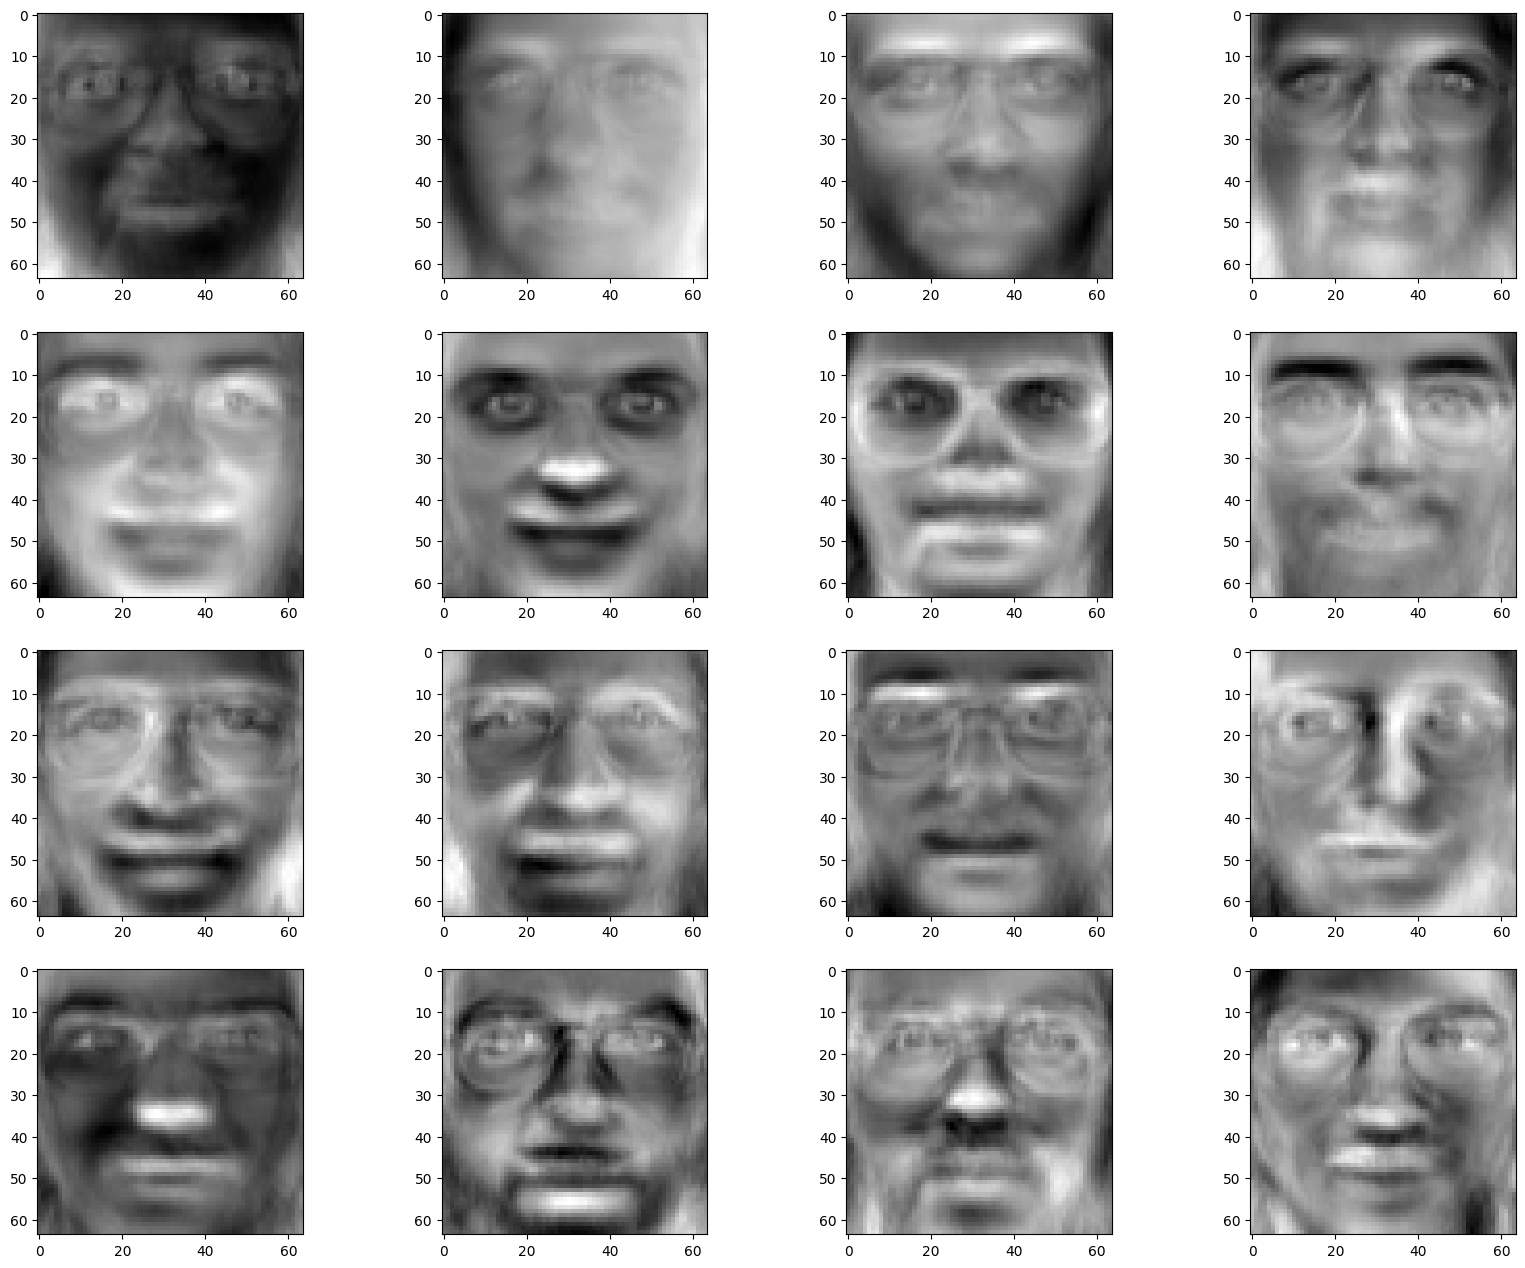

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
# Display a eigen face from components_

size = 16
sample_graph = np.random.randint(0,256,size)

plt.figure(figsize = (20,20))

ax =[]

for i in range(1,size+1):
    ax.append(plt.subplot(size // 4 + 1,4,i))
    plt.imshow(pca.components_[i-1].reshape((64,64)), cmap='gray')
    
plt.show()
plt.figure()